In [298]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [299]:
# results_dir = Path("results") / "vulpi"
results_dir = Path("results") / "husky"
# results_dir = Path("results") / "data_concat"

values = np.load(results_dir / "results_tsne_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_optim6_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_hamming_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_hamming_aug_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array([0, 0, 0, ..., 4, 4, 4]),
 'true': array([0, 0, 0, ..., 4, 4, 4]),
 'conf': array([[9.9924821e-01, 7.5173314e-04, 2.0022691e-17, 6.2711088e-13,
         5.7971437e-08],
        [1.0000000e+00, 5.2113010e-22, 3.4552186e-18, 9.7023319e-36,
         3.7840122e-13],
        [1.0000000e+00, 1.1031753e-33, 5.2434860e-22, 5.2746643e-36,
         2.7756263e-18],
        ...,
        [9.1276357e-13, 1.2843043e-23, 4.9860282e-23, 9.2278523e-09,
         1.0000000e+00],
        [7.8568130e-10, 1.6108334e-18, 2.0144333e-12, 3.4318506e-10,
         1.0000000e+00],
        [2.9434708e-12, 9.7374238e-18, 1.7189126e-13, 8.7865171e-10,
         1.0000000e+00]], dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'repr': array([[0.        , 0.        , 0.        , ..., 0.        , 0.25237548,
         0.307605  ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.10563278],
        [0.        , 0.        , 0.        ,

In [300]:
clf_values = values


# clf_values = values[1700]

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x


ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'husky hamming window')

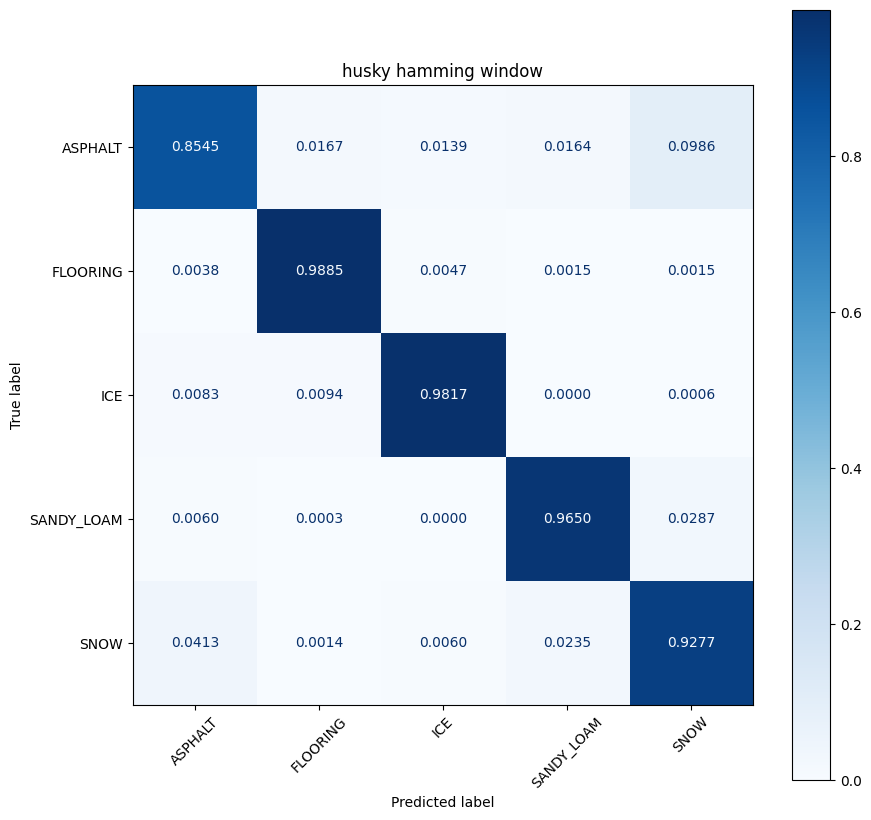

In [301]:
# terrains = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED", "ASPHALT", "FLOORING", "ICE", "SANDY_LOAM", "SNOW"]
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')

Text(0.5, 1.0, 'husky hamming window')

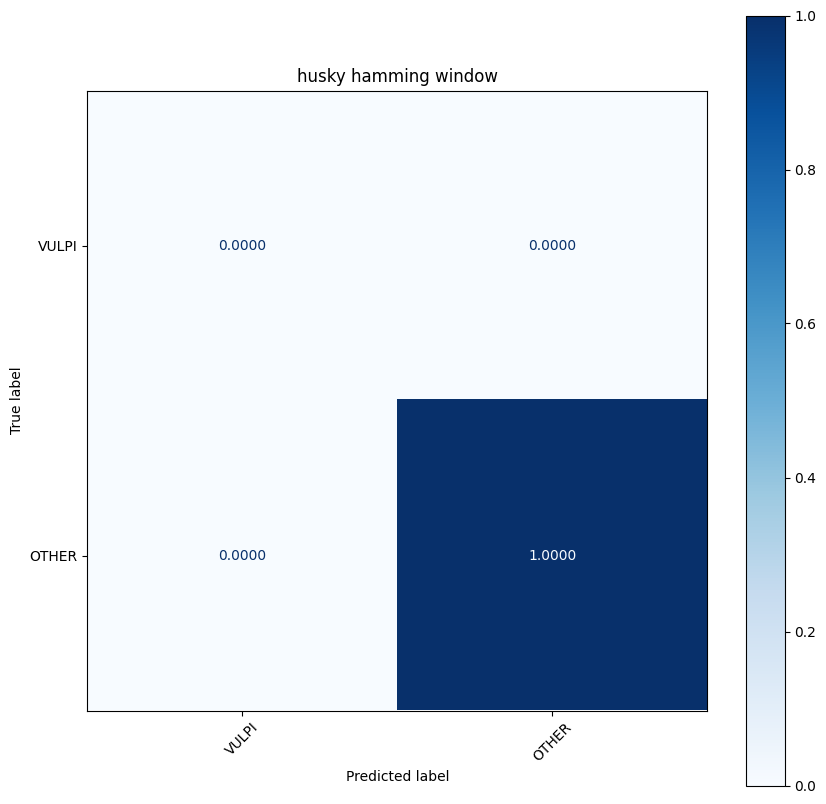

In [302]:
vulpi_terrain = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED"]
terr_test_bi = np.isin(terr_test, vulpi_terrain)
terr_pred_bi = np.isin(terr_pred, vulpi_terrain)

disp = ConfusionMatrixDisplay.from_predictions(
    terr_test_bi,
    terr_pred_bi,
    labels=[True, False],
    display_labels=['VULPI', 'OTHER'],
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')


Text(0.5, 1.0, 'husky')

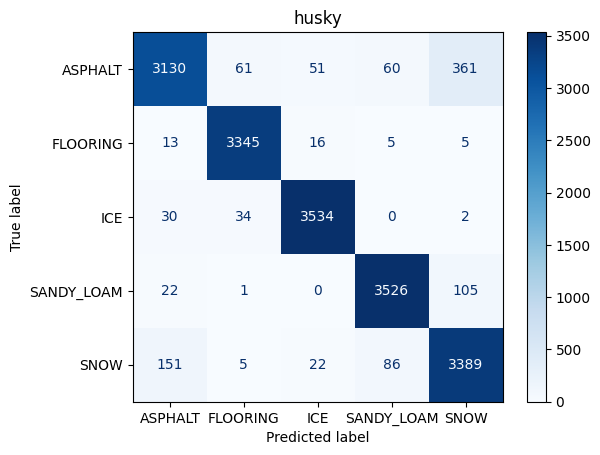

In [303]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [304]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted

In [305]:
metrics

accuracy                      0.942631
precision    [0.0, 0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0, 0.0]
dtype: object

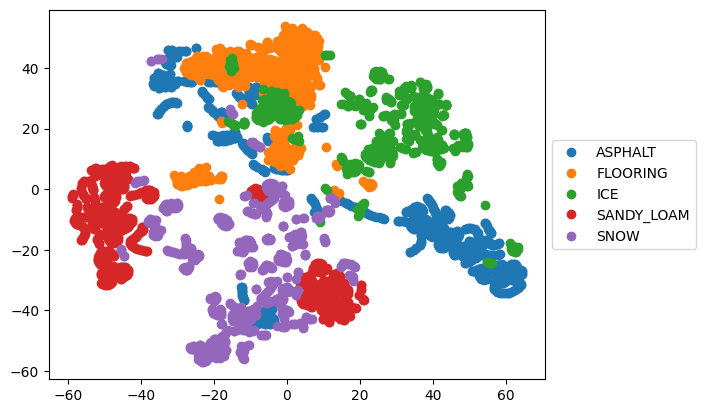

In [306]:
from sklearn.manifold import TSNE

k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)

# ytest
for i, terrain in enumerate(terrains):
    plt.plot(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], "o", label=terrain)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

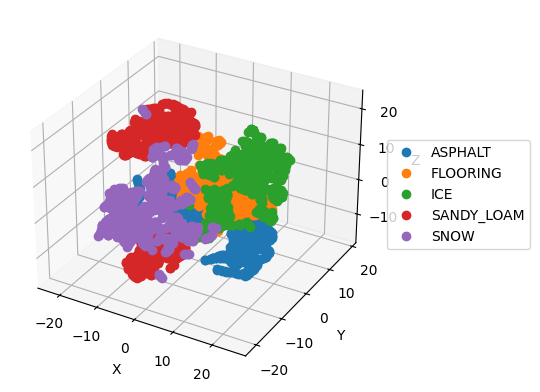

In [309]:
k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=3, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)



AttributeError: 'Axes3D' object has no attribute 'show'

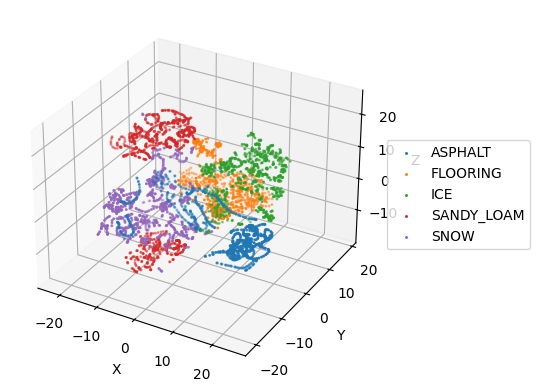

In [317]:
import matplotlib.animation as animation

ax = plt.figure().add_subplot(projection='3d')


for i, terrain in enumerate(terrains):
    ax.scatter(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], X_embedded[yytest == i, 2], "o", label=terrain, s=5, marker='.')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.show()

def rotate(angle):
    ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


In [312]:

rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


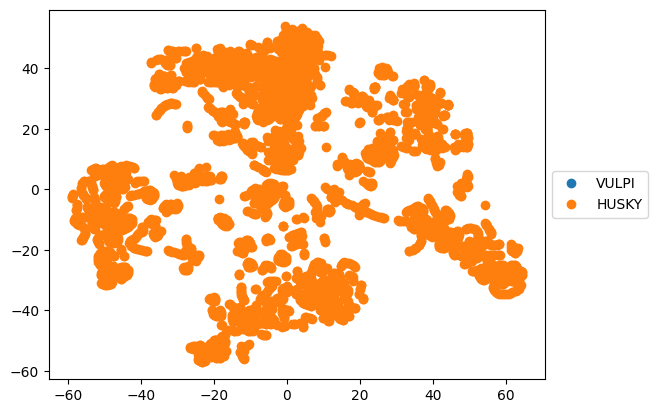

In [307]:
from sklearn.manifold import TSNE

k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size = num_pred // 5
X = X[fold_size * k:fold_size * (k + 1)]
yytest = ytest[fold_size * k:fold_size * (k + 1)]
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)

# ytest
plt.plot(X_embedded[np.isin(yytest, vulpi_terrain), 0], X_embedded[np.isin(yytest, vulpi_terrain), 1], "o", label="VULPI")
plt.plot(X_embedded[~np.isin(yytest, vulpi_terrain), 0], X_embedded[~np.isin(yytest, vulpi_terrain), 1], "o", label="HUSKY")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
